In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
import random
import math
import time
from scipy.stats import mode
start = time.time()

In [2]:
def train_test_split(random_state, 
                     input_x, 
                     input_y, 
                     shuffle, 
                     test_size):
    
    random.seed(random_state)
    n_size = len(input_x)
    
    test_split = math.ceil(n_size * test_size)
    rand_idx = random.sample(range(n_size), n_size)
    
    if shuffle:
        random.shuffle(rand_idx)
        
        testing_idx = rand_idx[0:test_split]
        training_idx = rand_idx[test_split:]
        
        return input_x[training_idx], input_x[testing_idx], input_y[training_idx],  input_y[testing_idx] 
    
    else: 

        testing_idx = rand_idx[0:test_split]
        training_idx = rand_idx[test_split:]
        
        return input_x[training_idx], input_x[testing_idx], input_y[training_idx],  input_y[testing_idx]
    
def knn_loop(X_train, y_train, X_test, y_test, num_k):
    
    _y_pred_class = []
    
    for index, each in enumerate(X_test):
        _dist_array = np.sqrt(
            (
                (X_train[:, 0] - X_test[index][0])**2
            ) + 
            
            (
                (X_train[:, 1] - X_test[index][1])**2
            )
        )

        _y_pred_class.append(np.argmax(np.bincount(y_train[np.argsort(_dist_array)][:num_k])))
    
    return np.array(_y_pred_class)

def knn_vector(X_train, y_train, X_test, y_test, num_k):
    
    x_square = np.sum(np.square(X_train)[:, np.newaxis, :], axis=2)
    y_square = np.sum(np.square(X_test), axis=1)
    xy = 2 * X_train.dot(X_test.T)
    distance = np.sqrt(x_square - xy + y_square)
    
    idx = np.argpartition(distance, num_k, axis=0)[:num_k]
    nearest_dists = np.take(y_train, idx)
    y_pred_class = mode(nearest_dists,axis=0)[0][0]
    
    return y_pred_class

def confusion_matrix(y_true, y_pred):
    
    num_k = len(np.unique(y_true))
    len_true = len(y_true)
    result_matrix = np.zeros((num_k, num_k))
    
    for each in range(len_true):
        result_matrix[y_true[each]][y_pred[each]] += 1
    
    return result_matrix

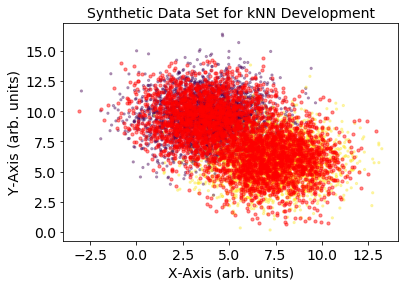

In [3]:
#Generate training dataset for k-NN Development.
X, y = make_blobs(n_samples=10000, 
                              centers=2, 
                              n_features=2,
                              cluster_std=1.75, 
                              center_box=(0, 10),
                              random_state=42)

#Implement train_test_split
X_train, X_test, y_train, y_test = train_test_split(random_state=42, 
                                                     input_x=X, 
                                                     input_y=y, 
                                                     shuffle=True, 
                                                     test_size=0.40)

#Plot out both datasets.
plt.scatter(X_test[:, 0], X_test[:, 1], s=10, color='red', 
            zorder=100, alpha=0.45)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            alpha=0.35, s=5)
plt.title('Synthetic Data Set for kNN Development', fontsize=14)
plt.xlabel('X-Axis (arb. units)', fontsize=14)
plt.ylabel('Y-Axis (arb. units)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()                                    

In [4]:
start = time.time()

In [5]:
y_pred_class = knn_loop(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_k=3)

In [6]:
confusion_matrix(y_test, y_pred_class)

array([[1829.,  185.],
       [ 179., 1807.]])

In [7]:
end = time.time()
print('Elapased Time: {0:.2f} seconds'.format(end-start))

Elapased Time: 2.02 seconds


In [8]:
start = time.time()

In [9]:
#Need to learn how to shape X_test, and X_train for broadcasting. 

In [10]:
y_pred_class = knn_vector(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_k=3)

In [11]:
confusion_matrix(y_test, y_pred_class)

array([[1829.,  185.],
       [ 179., 1807.]])

In [12]:
end = time.time()
print('Elapased Time: {0:.2f} seconds'.format(end-start))

Elapased Time: 1.95 seconds
